# Lab2 exercises 1

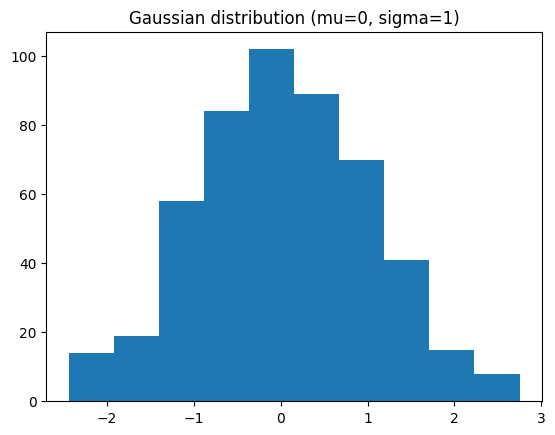

In [1]:
# Testing matplotlib import
from random import gauss
import matplotlib.pyplot as plt
%matplotlib inline
l = [gauss(0, 1) for _ in range(500)]
plt.hist(l)
plt.title('Gaussian distribution (mu=0, sigma=1)')
plt.show()

### Temperatures

#### Preliminary steps

In [2]:
!test -e GLT_filtered.csv || wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv -O GLT_filtered.csv

#### Exercise 2.1
Load the Global Land Temperature dataset as a list of lists. Before starting, take a moment to better inspect the attributes you are going to work on. How many of them are nominal, how many continuous or discrete?

In [3]:
import csv

dataset = [ [], [], [], [], [], [], [] ]
NUMBER_OF_COLS = 7
measurements = [ "date", "avg_temp", "avg_temp_uncertainity", "city", "country", "latitude", "longitude" ]
with open("GLT_filtered.csv") as f:
    number_of_rows = 0
    for row in csv.reader(f):
        number_of_rows = number_of_rows + 1
        if number_of_rows == 1:
            continue
        if len(row) == NUMBER_OF_COLS: # only do this if the number of columns is 7, as expected
            dataset[0].append(row[0])
            dataset[1].append(float(row[1]) if row[1] != "" else None)
            dataset[2].append(float(row[2]) if row[2] != "" else None)
            dataset[3].append(row[3])
            dataset[4].append(row[4])
            dataset[5].append(row[5])
            dataset[6].append(row[6])
        
print(f"Loaded {number_of_rows} rows")

Loaded 219576 rows


In [4]:
idx = 2
print(dataset[0][idx], dataset[1][idx], dataset[2][idx], dataset[3][idx], dataset[4][idx], dataset[5][idx], dataset[6][idx])

1849-03-01 None None Abidjan Côte D'Ivoire 5.63N 3.23W


#### Exercise 2.2
Analyze the attribute AverageTemperature, which contains missing values. Fill any gap with the arithmetic mean among the closest antecedent and the closest successive measurements in time, taken in the same city. Assume the following rules for edge cases:

(a) it can happen that a missing value does not have a preceding (or successive) measurement. This happens when the missing value is the first (or last) value of the dataset. If this is the case, consider the missing value to be preceded (or followed) by a 0, then compute the mean accordingly.

original_list = [ '', 5, 6, '' ]

step_1 = [ 2.5, 5, 6, '' ] # (0 + 5) / 2 

step_2 =[2.5,5,6, 3]#(6+0)/2

(b) if there are consecutive missing values, just compute them in temporal order and use the newly inserted values to evaluate the following ones. Here it is an example with a simple list where both (a) and (b) rules have been applied:
original_list
step_1
step_2

= [ '', '', 24, 28.9 ]

= [ 12, '', 24, 28.9 ] # (0 + 24) / 2

= [ 12, 18, 24, 28.9 ] # (12 + 24) / 2

In [5]:
# Find number of missing values
for i in range(NUMBER_OF_COLS):
    missing = 0
    for v in range(len(dataset[i])):
        if dataset[i][v] is None:
            missing = missing + 1
    print(f"Number of missing values for {measurements[i]} = {missing}")

Number of missing values for date = 0
Number of missing values for avg_temp = 27581
Number of missing values for avg_temp_uncertainity = 27581
Number of missing values for city = 0
Number of missing values for country = 0
Number of missing values for latitude = 0
Number of missing values for longitude = 0


In [6]:
# Find number of cities
cities = []
for i in range(len(dataset[3])):
    if dataset[3][i] not in cities:
        cities.append(dataset[3][i])
print(f"Number of cities = {len(cities)}")

Number of cities = 100


In [7]:
# _l = [ None, 2.0, 3.0, None, 5.0, 6.0, None, None, None, 1.0, None ]
def compute_missings(l, start, end):
    """function to fill missing values of a list"""
    antecedent = l[0]
    if antecedent is None:
        antecedent = 0
    for i in range(start, end):
        # print(f"Scanning {l[i]}:")
        # print(f" antecedent {antecedent}")
        if l[i] is None:
            # print(f"  current is none!")
            # Find first successive
            successive = None
            for miss_i in range(i, end):  # Not so efficent
                if l[miss_i] is not None:
                    successive = l[miss_i]
                    break
            # print(f"  next successive is {successive}")
            if successive is None:
                successive = 0
            l[i] = (antecedent + successive) / 2
            # print(f" set value to {l[i]}")

        antecedent = l[i]
        # print()
        
# compute_missings(_l, 0, len(_l))
# print(_l)

In [8]:
print(dataset[1][0:10])
compute_missings(dataset[1], 0, 10)

[26.704, 27.434, None, 26.14, 25.427, 24.844, 24.058000000000003, 23.576, None, 25.263]


In [9]:
idx = 8
print(dataset[0][idx], dataset[1][idx], dataset[2][idx], dataset[3][idx], dataset[4][idx], dataset[5][idx], dataset[6][idx])

1849-09-01 24.4195 None Abidjan Côte D'Ivoire 5.63N 3.23W


In [10]:
city_idx = 0
print(f"Compute missing values")
len_of_dataset = len(dataset[0])
for i in range(len_of_dataset):
    if dataset[3][city_idx] != dataset[3][i] or i == len_of_dataset - 1:
        print(f" City {dataset[3][city_idx]} from {city_idx} to {i-1}")
        compute_missings(dataset[1], city_idx, i)
        city_idx = i

Compute missing values
 City Abidjan from 0 to 1967
 City Addis Abeba from 1968 to 3923
 City Ahmadabad from 3924 to 6275
 City Aleppo from 6276 to 8627
 City Alexandria from 8628 to 10979
 City Ankara from 10980 to 13331
 City Baghdad from 13332 to 15659
 City Bangalore from 15660 to 18011
 City Bangkok from 18012 to 20363
 City Belo Horizonte from 20364 to 22535
 City Berlin from 22536 to 24887
 City Bogotá from 24888 to 27155
 City Bombay from 27156 to 29507
 City Brasília from 29508 to 31679
 City Cairo from 31680 to 34031
 City Calcutta from 34032 to 36383
 City Cali from 36384 to 38639
 City Cape Town from 38640 to 40511
 City Casablanca from 40512 to 42863
 City Changchun from 42864 to 45172
 City Chengdu from 45173 to 47481
 City Chicago from 47482 to 49833
 City Chongqing from 49834 to 51909
 City Dakar from 51910 to 53877
 City Dalian from 53878 to 56081
 City Dar Es Salaam from 56082 to 58037
 City Delhi from 58038 to 60389
 City Dhaka from 60390 to 62741
 City Durban from 6

#### Exercise 2.3
Define a function that, given the name of a city and an integer N > 0, prints: 
(a) the top N hottest measurements;
(b) the top N coldest measurements.

In [11]:
def extract_index_of_a_city(city):
    idx_start = None
    idx_end = None
    for i in range(len(dataset[0])):
        if dataset[3][i] == city and idx_start is None:
            idx_start = i
        if dataset[3][i] != city and idx_start is not None and idx_end is None:
            idx_end = i
            break
    if idx_end is None and i == len(dataset[0]) - 1:
        idx_end = i
    return idx_start, idx_end - 1

print(extract_index_of_a_city("Rome"))

(171503, 173854)


In [12]:
def hottest_and_coldest_n_of_a_city(city, n):
    start, end = extract_index_of_a_city(city)
    if start is None or end is None:
        return [], []
    city_temp = sorted(dataset[1][start:end])
    # print(city_temp)
    return city_temp[(len(city_temp)-n):], city_temp[:n]  # hottest n, coldest n

print(hottest_and_coldest_n_of_a_city("Rome", 3))

([24.873, 24.998, 25.951], [-1.4410000000000005, -1.3039999999999994, -1.0189999999999997])


#### Exercise 2.4
(*) Let’s search for other anomalies in data distribution with the help of matplotlib. Plot the distribution of the average land temperatures for Rome and Bangkok using the aforementioned histogram plotting function.

As you can see, Rome and Bangkok have very different temperature distributions, but this seems plausible. What it looks strange is the large difference in their temperatures’ magnitude. Is it possible that all sensors from Bangkok stations, along the entire time-span, were faulty? Could they were configured to use another representation of the temperature measurement? Can you figure out a data cleaning step to solve it?

In [13]:
city_a_start, city_a_end = extract_index_of_a_city("Rome")
temps_a = dataset[1][city_a_start:city_a_end]
dates_a = []
for i in range(city_a_start, city_a_end):
    dates_a.append(dataset[0][i])
city_a_start, city_a_end

(171503, 173854)

In [14]:
city_b_start, city_b_end = extract_index_of_a_city("Bangkok")
temps_b = dataset[1][city_b_start:city_b_end]
dates_b = []
for i in range(city_b_start, city_b_end):
    dates_b.append(dataset[0][i])
city_b_start, city_b_end

(18012, 20363)

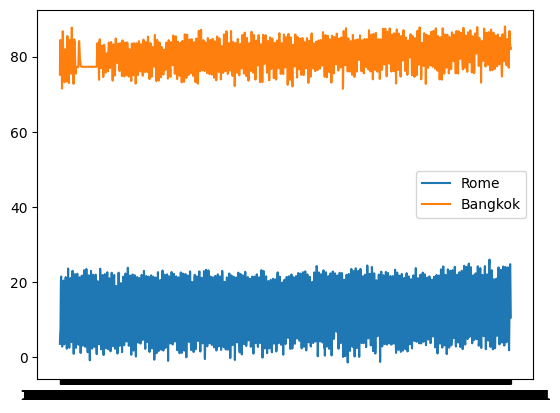

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(dates_a, temps_a ,label="Rome")
plt.plot(dates_a, temps_b ,label="Bangkok")
# plt.yticks(temps_a)
plt.legend()
plt.show()

In [16]:
## fahrenheit??